In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io

from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('train.csv')


In [ ]:
data.drop(['s53'],axis=1,inplace=True)

In [ ]:
filtered_data = data.dropna(axis = 1)

In [ ]:
end = LabelEncoder()
filtered_data['gender'] = end.fit_transform(filtered_data['gender'])
filtered_data['s11'] = end.fit_transform(filtered_data['s11'])
filtered_data['s12'] = end.fit_transform(filtered_data['s12'])
filtered_data['s16'] = end.fit_transform(filtered_data['s16'])
filtered_data['s17'] = end.fit_transform(filtered_data['s17'])
filtered_data['s18'] = end.fit_transform(filtered_data['s18'])
filtered_data['s52'] = end.fit_transform(filtered_data['s52'])
filtered_data['s58'] = end.fit_transform(filtered_data['s58'])
filtered_data['s69'] = end.fit_transform(filtered_data['s69'])
filtered_data['s70'] = end.fit_transform(filtered_data['s70'])
filtered_data['s71'] = end.fit_transform(filtered_data['s71'])
filtered_data['id'] = end.fit_transform(filtered_data['id'])
filtered_data.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,18782,1,1,0,1,3,3,1,0,1,...,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,2100,1,1,1,1,3,3,1,1,1,...,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,16554,1,1,1,1,3,3,1,0,1,...,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,25665,0,1,1,1,3,3,1,0,1,...,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,5937,1,0,1,1,1,3,3,1,2,...,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(filtered_data)


PCA(n_components=5)

In [ ]:
from sklearn.model_selection import train_test_split
y = data.label
x = filtered_data.drop(['label','s16' , 's17', 's18', 'n1', 'n7'], axis = 1)

In [ ]:
x

,id,gender,s11,s12,s13,s48,s52,s58,s69,s70,...,n5,n6,n8,n9,n10,n11,n12,n13,n14,n15
0,18782,1,1,0,1,0,1,1,2,3,...,-32.839277,0.017176,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5
1,2100,1,1,1,1,1,1,1,2,3,...,-32.576597,0.013857,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3
2,16554,1,1,1,1,0,1,1,2,3,...,-32.510544,0.013943,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2
3,25665,0,1,1,1,0,1,1,2,3,...,-32.398679,0.010387,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4
4,5937,1,0,1,1,1,2,1,3,3,...,-32.396746,0.016289,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28317,4272,1,1,1,1,0,1,1,2,3,...,-33.086259,0.007216,1.877460,3.637551,11.404942,1.862441,0,0,0.019793,5
28318,14290,1,1,1,1,0,1,1,2,3,...,-32.775474,0.013369,1.559138,4.247487,5.530054,1.671527,0,0,0.371074,2
28319,19600,0,1,1,1,0,1,1,2,3,...,-32.575975,0.017782,1.455911,2.900249,6.058681,1.627479,0,1,0.826587,1
28320,15338,1,1,1,1,1,1,1,3,2,...,-32.577563,0.007324,2.074394,10.673259,11.387646,1.560391,0,0,0.103523,5


In [ ]:
from sklearn import preprocessing

x1 = x.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x1)
prep_x = pd.DataFrame(x_scaled)

prep_x.shape

(28322, 24)

In [ ]:
prep_x.head()

prep_x2 = pd.DataFrame(data=prep_x.values, columns=x.columns)

x = prep_x2

In [ ]:
# result = x.apply(lambda iterator: ((iterator - iterator.mean())/iterator.std()).round(4))

# result.head()


In [ ]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size= 0.2, random_state = 1)


In [ ]:
train_x

,id,gender,s11,s12,s13,s48,s52,s58,s69,s70,...,n5,n6,n8,n9,n10,n11,n12,n13,n14,n15
3389,0.108612,1.0,1.0,1.0,1.0,1.0,0.333333,1.0,0.666667,1.0,...,0.818821,0.188292,0.417585,0.772794,0.940462,0.116444,0.0,0.0,0.687603,0.333333
9526,0.441828,0.0,1.0,1.0,1.0,0.0,0.333333,1.0,0.666667,1.0,...,0.815652,0.548877,0.415517,0.657966,0.586291,0.640608,0.0,0.0,0.206159,0.666667
26922,0.247414,0.0,1.0,1.0,1.0,0.0,0.333333,1.0,0.666667,1.0,...,0.674049,0.587105,0.277503,0.119234,0.329214,0.196484,0.0,1.0,0.480051,0.833333
26986,0.372197,1.0,1.0,1.0,1.0,0.0,0.000000,1.0,0.333333,1.0,...,0.210492,0.740414,0.307571,0.382990,0.329934,0.834275,0.0,0.0,0.696687,1.000000
4599,0.436637,0.0,1.0,1.0,1.0,0.0,0.333333,1.0,0.666667,1.0,...,0.876998,0.572472,0.324652,0.175126,0.464049,0.213845,0.0,0.0,0.719965,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.090887,0.0,1.0,1.0,1.0,0.0,0.333333,1.0,0.666667,1.0,...,0.596295,0.667367,0.313644,0.088288,0.456590,0.514542,0.0,0.0,0.229380,0.166667
17289,0.526676,1.0,1.0,1.0,1.0,1.0,0.333333,1.0,1.000000,1.0,...,0.522079,0.290875,0.618491,0.922423,0.615043,0.398686,0.0,0.0,0.929365,0.500000
5192,0.253416,1.0,0.0,1.0,1.0,0.0,0.333333,1.0,0.666667,1.0,...,0.814603,0.545347,0.214652,0.459608,0.171664,0.581017,0.0,0.0,0.795347,0.500000
12172,0.410755,1.0,1.0,1.0,1.0,0.0,0.333333,1.0,0.666667,1.0,...,0.935398,0.655276,0.289262,0.588520,0.386626,0.849126,0.0,0.0,0.649168,0.166667


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

clf = MLPClassifier(random_state=1, max_iter=300).fit(train_x, train_y)
#clf.predict_proba(val_x)
clf.predict(val_x)
clf.score(val_x, val_y)

0.892144748455428

In [ ]:
# machine learning model_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Boyes']
#model_list = ['Random Forest']
acc_list = []
auc_list = []
cm_list = []
for model in model_pipeline: 
  model.fit(train_x, train_y)
  y_pred = model.predict(val_x)
  acc_list.append(metrics.accuracy_score(val_y, y_pred))
  fpr, tpr, _thresholds = metrics.roc_curve(val_y, y_pred)
  auc_list.append(round(metrics.auc(fpr,tpr),2))
  cm_list.append (confusion_matrix(val_y, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
pred_y = rfc.predict(val_x)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(val_y, pred_y))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      4723
           1       0.74      0.55      0.63       942

    accuracy                           0.89      5665
   macro avg       0.83      0.76      0.78      5665
weighted avg       0.89      0.89      0.89      5665



In [ ]:
result_df = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list, 'AUC': auc_list })
result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.883495,0.73
1,SVM,0.888085,0.73
2,KNN,0.871668,0.72
3,Decision Tree,0.846602,0.72
4,Random Forest,0.893380,0.75
5,Naive Boyes,0.865137,0.76


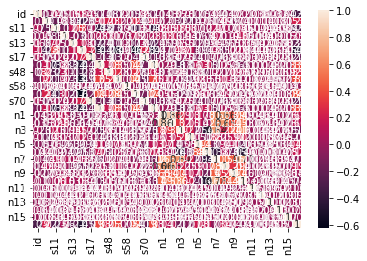

In [ ]:
sns.heatmap(filtered_data.corr(), annot =True )
sns.set(rc = {'figure.figsize':(1024,768)})
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.show()

<Figure size 1440x720 with 0 Axes>

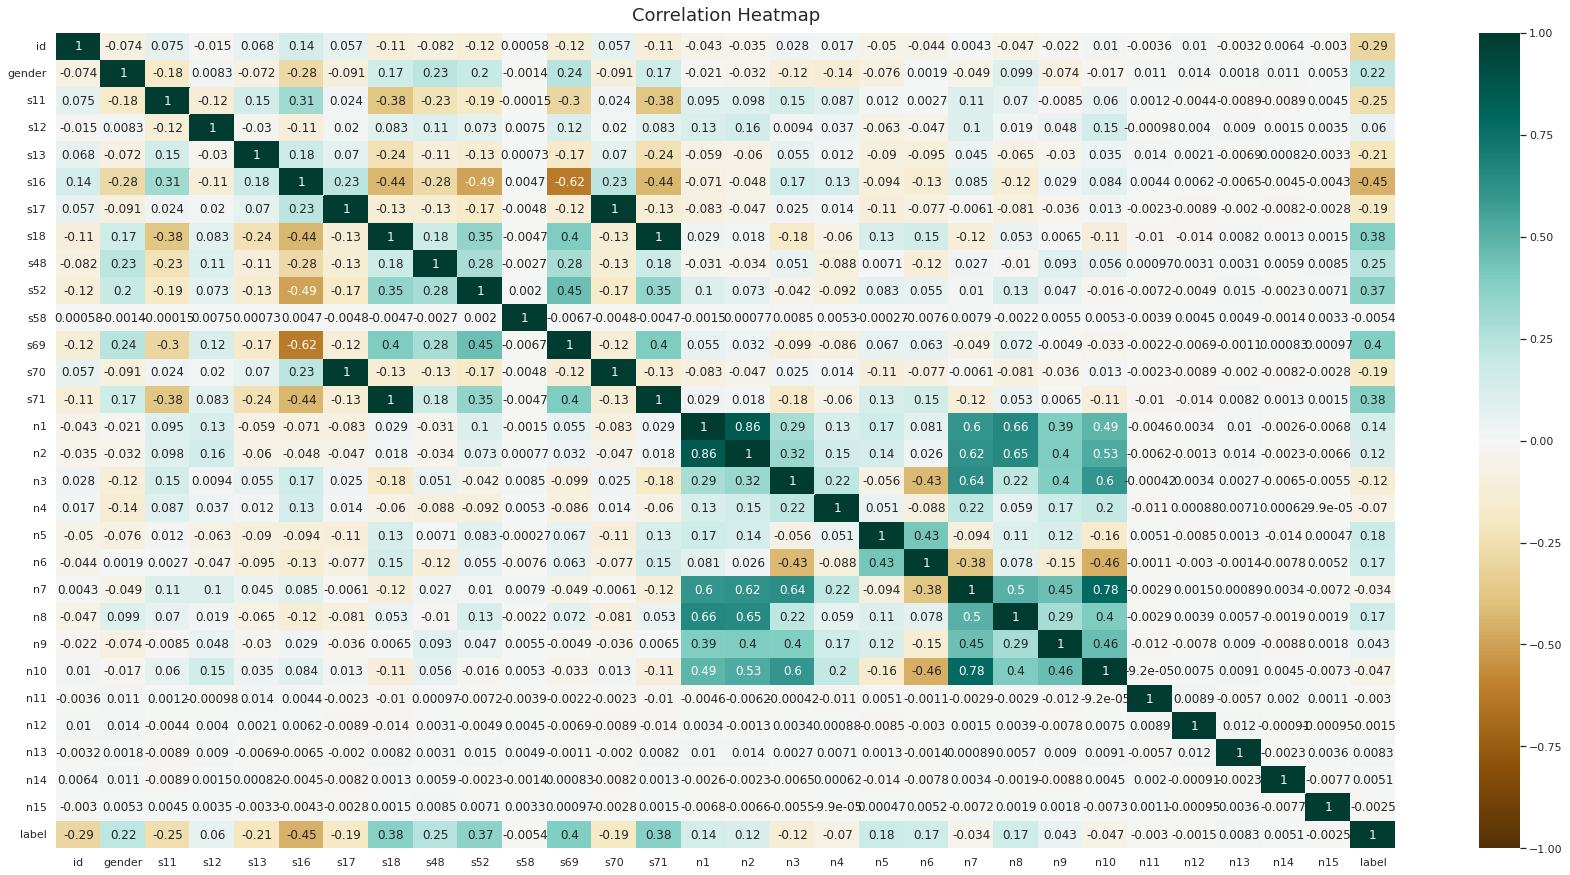

In [ ]:
plt.figure(figsize=(30, 15))
heatmap = sns.heatmap(filtered_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=400, bbox_inches='tight')


**TEST** **PART**

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# knn.fit(train_x, train_y)
# pred2_y = knn.predict(val_x)

In [ ]:

#print(classification_report(val_y, pred2_y))

In [ ]:
data2 = pd.read_csv('test.csv')

In [ ]:
data2.shape

(85065, 35)

In [ ]:
#filtered_data2 = data2.dropna(axis = 1)
#end2 = LabelEncoder()


#filtered_data2.sample(5)

In [ ]:
data2.drop(['s53'],axis=1,inplace=True)
filtered_data2 = data2.dropna(axis = 1)
end = LabelEncoder()
filtered_data2['gender'] = end.fit_transform(filtered_data2['gender'])
filtered_data2['s11'] = end.fit_transform(filtered_data2['s11'])
filtered_data2['s12'] = end.fit_transform(filtered_data2['s12'])
filtered_data2['s16'] = end.fit_transform(filtered_data2['s16'])
filtered_data2['s17'] = end.fit_transform(filtered_data2['s17'])
filtered_data2['s18'] = end.fit_transform(filtered_data2['s18'])
filtered_data2['s52'] = end.fit_transform(filtered_data2['s52'])
filtered_data2['s58'] = end.fit_transform(filtered_data2['s58'])
filtered_data2['s69'] = end.fit_transform(filtered_data2['s69'])
filtered_data2['s70'] = end.fit_transform(filtered_data2['s70'])
filtered_data2['s71'] = end.fit_transform(filtered_data2['s71'])
filtered_data2['id'] = end.fit_transform(filtered_data2['id'])
filtered_data2.sample(5)

(28322, 24)

In [ ]:
#filtered_data2.id.unique().shape

In [504]:
test_x = filtered_data2

In [505]:
test_x = filtered_data2.drop(['s16' , 's17', 's18', 'n1', 'n7'], axis = 1)

In [506]:
x2 = test_x.values
min_max_scaler = preprocessing.MinMaxScaler()
x2_scaled = min_max_scaler.fit_transform(x2)
prep_x2 = pd.DataFrame(x2_scaled)

prep_x2.shape

(85065, 24)

In [507]:
prep_x2.head()

prep_xx = pd.DataFrame(data=prep_x2.values, columns=test_x.columns)

test_x = prep_xx

test_x.head()

,id,gender,s11,s12,s13,s48,s52,s58,s69,s70,...,n5,n6,n8,n9,n10,n11,n12,n13,n14,n15
0,0.071546,1.0,1.0,1.0,1.0,0.0,0.666667,1.0,1.000000,1.000000,...,0.932772,0.873321,0.937691,0.478128,0.317720,0.482720,0.0,0.0,0.439274,0.333333
1,0.313388,1.0,1.0,1.0,1.0,1.0,0.666667,0.0,1.000000,0.666667,...,0.914366,0.352395,0.591598,0.974752,0.468311,0.041798,0.0,0.0,0.084332,0.666667
2,0.707961,1.0,1.0,0.0,1.0,1.0,0.666667,1.0,1.000000,1.000000,...,0.866861,0.555821,0.690863,0.044591,0.381481,0.722074,0.0,0.0,0.984220,0.000000
3,0.352946,1.0,1.0,1.0,1.0,0.0,0.333333,1.0,0.666667,1.000000,...,0.368684,0.517138,0.497367,0.445204,0.376422,0.730385,0.0,0.0,0.003489,0.166667
4,0.081445,1.0,1.0,1.0,1.0,1.0,0.333333,1.0,0.666667,0.666667,...,0.662619,0.205848,0.780967,0.496588,0.944704,0.952509,0.0,0.0,0.060612,0.000000


In [509]:
pred_test = rfc.predict(test_x)

In [510]:
pred_test2 = clf.predict(test_x)


In [514]:
pred_test[:50]


array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0])

In [515]:
pred_test2[:50]

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0])

In [516]:
filtered_data2['pred'] = pred_test2

#data.to_csv('data1.csv')

filtered_data2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,pred
0,6086,1,1,1,1,1,3,3,0,2,...,-9.200175,2.122970,6.646617,4.801224,1.693087,0,0,0.439270,2,1
1,26658,1,1,1,1,1,2,1,1,2,...,-8.897092,1.770889,11.046294,6.407230,1.516728,0,0,0.084334,4,1
2,60222,1,1,0,1,1,3,1,1,2,...,-9.173660,1.871872,2.805834,5.481219,1.788823,0,0,0.984210,0,0
3,30023,1,1,1,1,3,3,1,0,1,...,-9.178200,1.675028,6.354938,5.427266,1.792147,0,0,0.003492,1,0
4,6928,1,1,1,1,3,2,1,1,1,...,-8.726633,1.963535,6.810158,11.487845,1.880992,0,0,0.060614,0,0


In [517]:
sample_submission = pd.DataFrame()
sample_submission['id'] = data2.id

sample_submission.head()

,id
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...


In [518]:
sample_submission['label'] = pred_test2

sample_submission.head()

,id,label
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,1
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,1
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,0
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,0
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,0


In [519]:
sample_submission.to_csv('starfish_submission3.csv')
